In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from collections import Counter

In [3]:
data = pd.read_csv('ubike2301.csv')
#依據資料時間排序
data = data.sort_values(by='infodate')

# print(data)
# filter = (data['infodate'] < "2023-02-15")
# print(type(data['infodate']))
# print(type(filter))
# print(filter)
# data = data[filter]
data['infodate'] = pd.to_datetime(data['infodate'])

data = data.set_index(data['infodate'])
data['count'] = 1
print(data)

                      rent_time   rent_station          return_time  \
infodate                                                              
2023-02-01  2023-02-01 10:00:00       文化三杏林一路口  2023-02-01 10:00:00   
2023-02-01  2023-02-01 14:00:00  捷運忠孝敦化站(2號出口)  2023-02-01 15:00:00   
2023-02-01  2023-02-01 15:00:00  捷運忠孝敦化站(2號出口)  2023-02-01 15:00:00   
2023-02-01  2023-02-01 16:00:00  捷運忠孝敦化站(2號出口)  2023-02-01 16:00:00   
2023-02-01  2023-02-01 17:00:00  捷運忠孝敦化站(2號出口)  2023-02-01 17:00:00   
...                         ...            ...                  ...   
2023-02-28  2023-02-28 19:00:00         南京新生路口  2023-02-28 20:00:00   
2023-02-28  2023-02-28 21:00:00         南京新生路口  2023-02-28 21:00:00   
2023-02-28  2023-02-28 22:00:00         南京新生路口  2023-02-28 23:00:00   
2023-02-28  2023-02-28 22:00:00         南京新生路口  2023-02-28 22:00:00   
2023-02-28  2023-02-28 20:00:00        延平北中正路口  2023-02-28 20:00:00   

           return_station      rent   infodate  count  
infodate            

In [4]:
daily = data['count']
daily = daily.resample("D").sum()

In [5]:
daily_sorted = daily.sort_values()

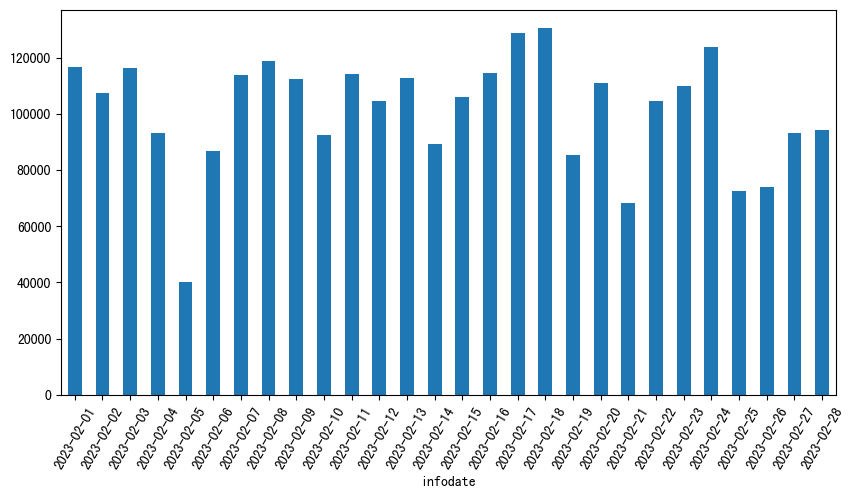

In [6]:
fig, ax = plt.subplots()
daily.plot(kind = "bar", ax = ax, figsize=(10,5))
ax.set_xticklabels([x.strftime("%Y-%m-%d") for x in daily.index], rotation = 60)
plt.show()

In [7]:
rain_info = [0, 0, 0, 0.1, 16, 16, 0.1, 0, 0.1, 2.0, 0, 0, 0.1, 0.5, 0, 0.1, 0, 0, 0.1, 0.1, 2.0, 0.5, 0.5,
             0.1, 0.1, 0.1, 0, 0]
rain = pd.DataFrame(rain_info, columns=['rain_drop'], index = list(daily.index))
print(rain)

            rain_drop
2023-02-01        0.0
2023-02-02        0.0
2023-02-03        0.0
2023-02-04        0.1
2023-02-05       16.0
2023-02-06       16.0
2023-02-07        0.1
2023-02-08        0.0
2023-02-09        0.1
2023-02-10        2.0
2023-02-11        0.0
2023-02-12        0.0
2023-02-13        0.1
2023-02-14        0.5
2023-02-15        0.0
2023-02-16        0.1
2023-02-17        0.0
2023-02-18        0.0
2023-02-19        0.1
2023-02-20        0.1
2023-02-21        2.0
2023-02-22        0.5
2023-02-23        0.5
2023-02-24        0.1
2023-02-25        0.1
2023-02-26        0.1
2023-02-27        0.0
2023-02-28        0.0


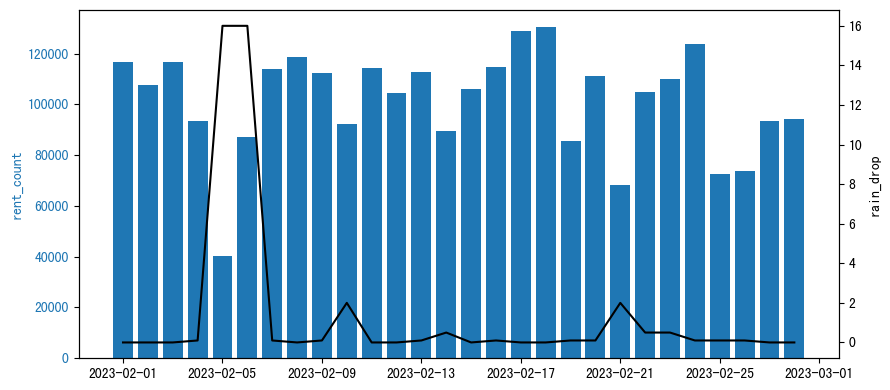

In [8]:
fig, ax1 = plt.subplots(figsize = (9,4))
ax2 = ax1.twinx()

ax1.bar(daily.index, daily.values, color = 'tab:blue')
ax1.set_ylabel('rent_count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2.plot(rain, color = 'black')
ax2.set_ylabel('rain_drop', color='black')


fig.tight_layout()
plt.show()

In [9]:
tmp = pd.DataFrame(1, columns=['count'], index = list(pd.to_datetime(data['rent_time'])))
tmp = tmp.sort_index()
tmp = tmp.resample('2H').sum()

In [10]:
column_list = []
for i in range(12):
    k = str(i * 2) + "~" + str((i + 1) * 2)
    column_list.append(k)
rent_time = pd.DataFrame(tmp['count'].values.reshape(28,12), columns = column_list, index = list(daily.index))
print(type(rent_time))


<class 'pandas.core.frame.DataFrame'>


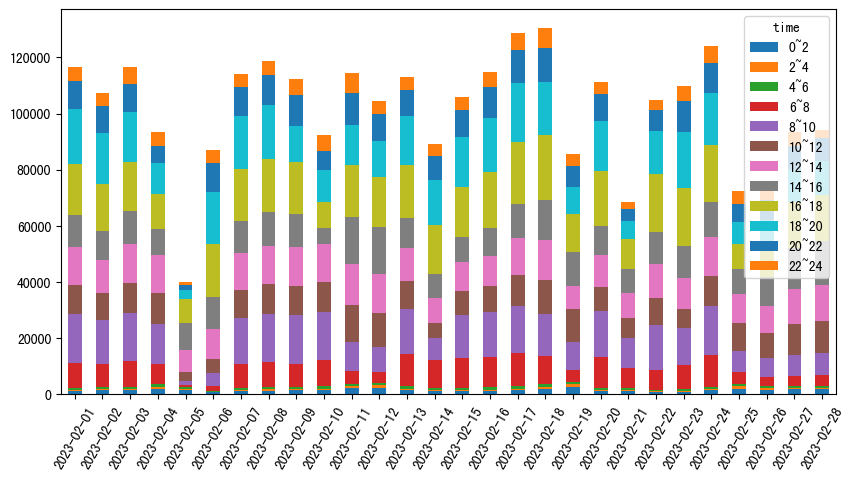

In [11]:
fig, ax = plt.subplots(figsize = (20,15))
rent_time.plot(kind = "bar", stacked = True, ax = ax, figsize=(10,5))
ax.set_xticklabels([x.strftime("%Y-%m-%d") for x in rent_time.index], rotation = 60)
# ax.get_legend().remove()
plt.legend(loc = 1, title = "time")
plt.show()

In [12]:
sum_list = []
for i in rent_time.columns:
    s = rent_time[i].sum()
    sum_list.append(s)
rent_time_sum = pd.Series(sum_list ,index = column_list)
print(rent_time_sum)

0~2       41960
2~4       14004
4~6       22195
6~8      207091
8~10     358005
10~12    268513
12~14    334335
14~16    318612
16~18    471552
18~20    416495
20~22    250290
22~24    134665
dtype: int64


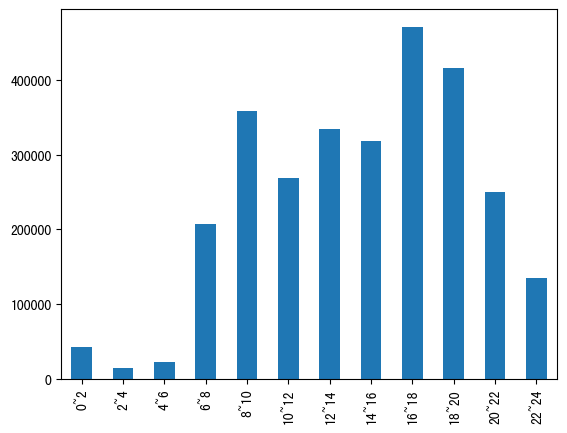

In [13]:
rent_time_sum.plot(kind = 'bar')
plt.show()

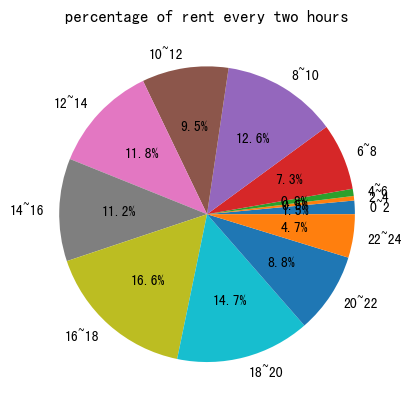

In [14]:
rent_time_sum.plot(kind = 'pie', title = "percentage of rent every two hours", autopct = "%1.1f%%", fontsize = 10)
plt.show()

0~2       25973
2~4        7953
4~6       15031
6~8      169724
8~10     283714
10~12    186329
12~14    241860
14~16    221106
16~18    356716
18~20    329628
20~22    188872
22~24     95803
dtype: int64


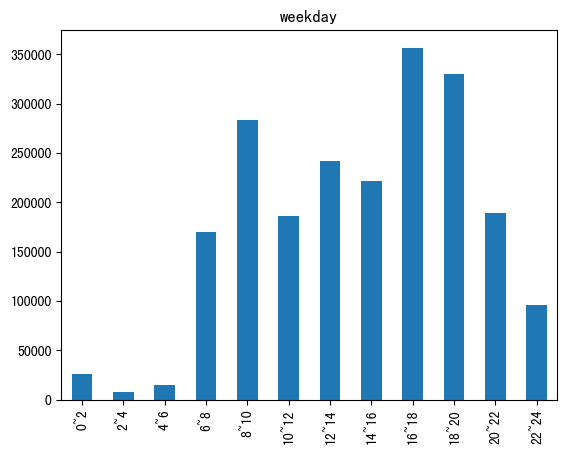

0~2       15987
2~4        6051
4~6        7164
6~8       37367
8~10      74291
10~12     82184
12~14     92475
14~16     97506
16~18    114836
18~20     86867
20~22     61418
22~24     38862
dtype: int64


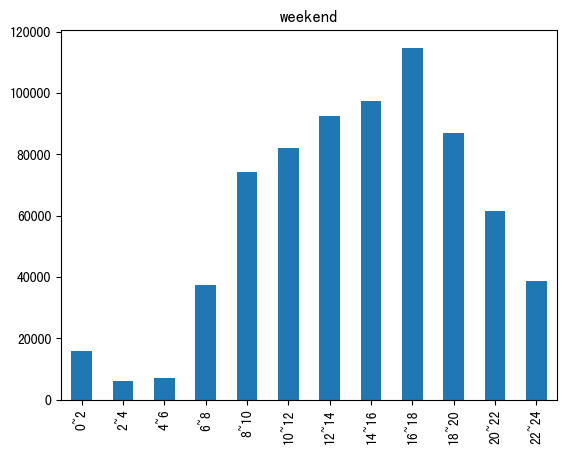

In [15]:
weekend = ['2023-02-04', '2023-02-05', '2023-02-11', '2023-02-12', '2023-02-18',
           '2023-02-19', '2023-02-25', '2023-02-26']
weekday = list(rent_time.index)
for i in weekend:
    weekday.remove(pd.to_datetime(i))

weekend_rent = rent_time.loc[weekend]
weekday_rent = rent_time.loc[weekday]

weekend_sum_list = []
for i in weekend_rent.columns:
    s = weekend_rent[i].sum()
    weekend_sum_list.append(s)
weekend_rent_sum = pd.Series(weekend_sum_list ,index = column_list)

weekday_sum_list = []
for i in weekday_rent.columns:
    s = weekday_rent[i].sum()
    weekday_sum_list.append(s)
weekday_rent_sum = pd.Series(weekday_sum_list ,index = column_list)

print(weekday_rent_sum)
weekday_rent_sum.plot(kind = 'bar', title = 'weekday')
plt.show()

print(weekend_rent_sum)
weekend_rent_sum.plot(kind = 'bar', title = 'weekend')
plt.show()

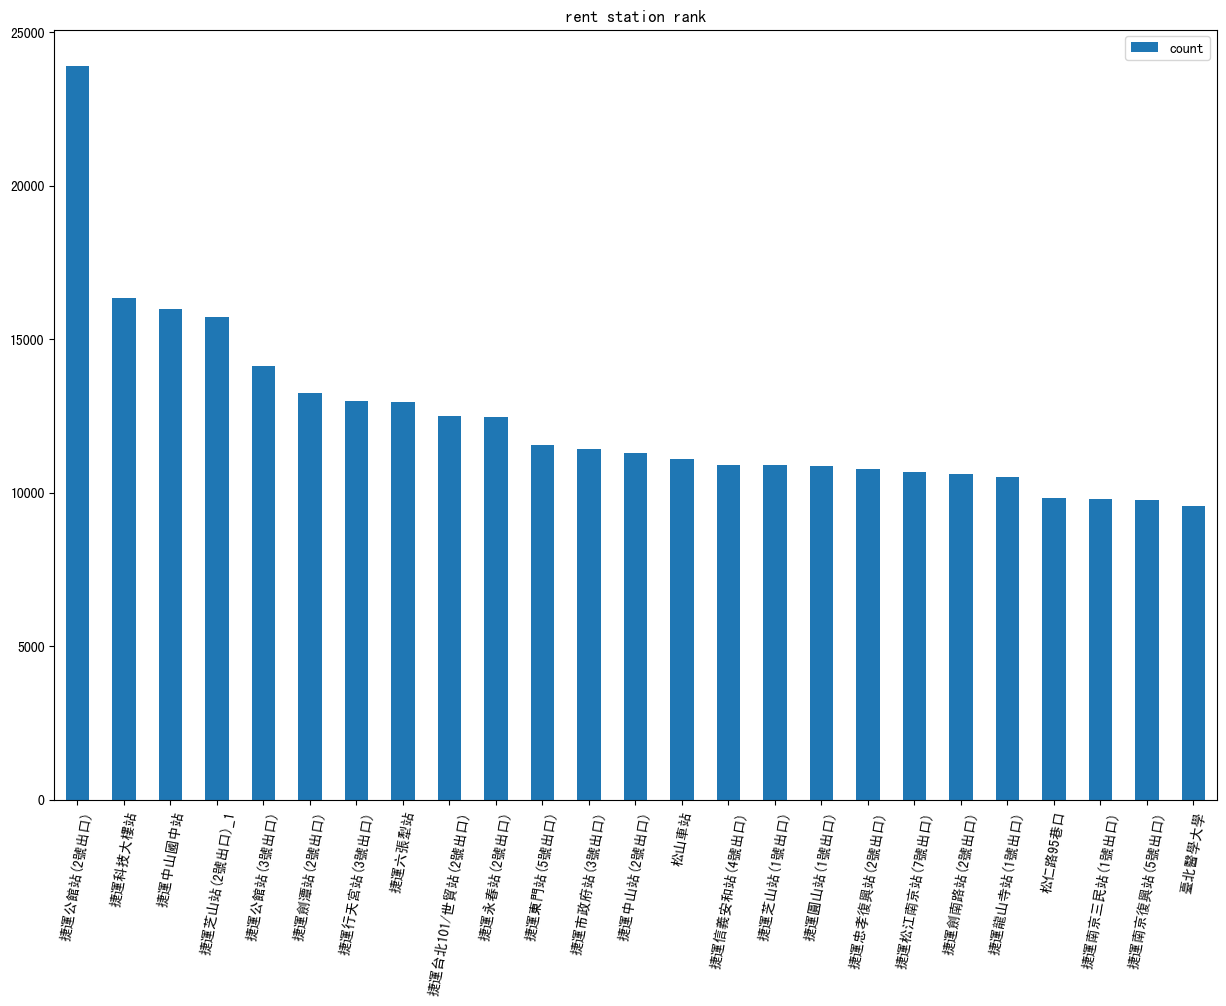

In [16]:
count_rent_sattions = Counter(data['rent_station'])
count_rent_sattions_sorted = pd.DataFrame.from_dict(count_rent_sattions, orient= 'index', columns = ['count'])
count_rent_sattions_sorted = count_rent_sattions_sorted.sort_values(by = ['count'], ascending=False)

count_rent_sattions_sorted.head(25).plot(kind = 'bar', figsize = (15,10), title = 'rent station rank')
plt.xticks(rotation = 80)
plt.show()

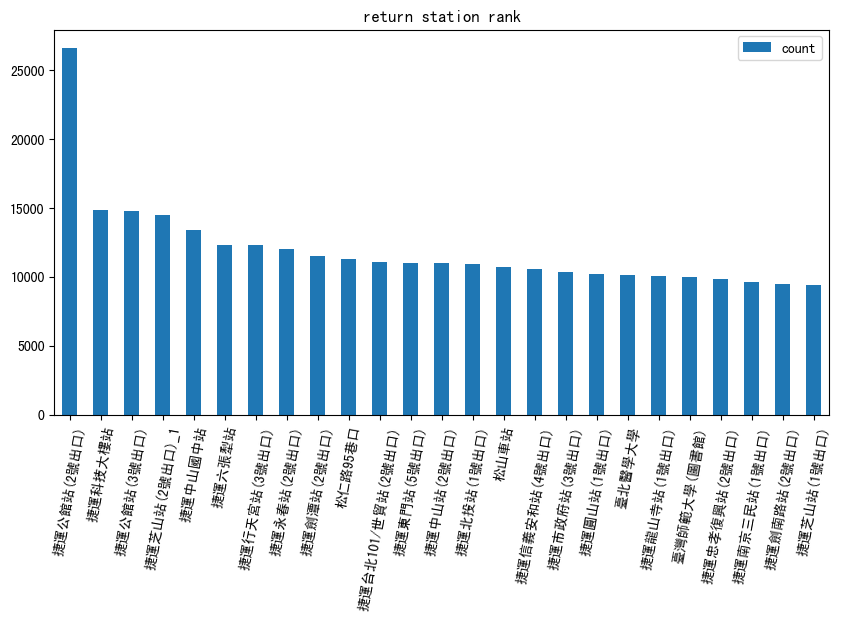

In [17]:
count_return_sattions = Counter(data['return_station'])
count_return_sattions_sorted = pd.DataFrame.from_dict(count_return_sattions, orient= 'index', columns = ['count'])
count_return_sattions_sorted = count_return_sattions_sorted.sort_values(by = ['count'], ascending=False)

count_return_sattions_sorted.head(25).plot(kind = 'bar', figsize = (10,5), title = 'return station rank')
plt.xticks(rotation = 80)
plt.show()

In [22]:
tmp = dict(count_rent_sattions)
mrt_count_rent = 0
for i in tmp.keys():
    if '捷運' in i:
        mrt_count_rent += count_rent_sattions[i] 
print(mrt_count_rent)  

tmp = dict(count_return_sattions)
mrt_count_return = 0
for i in tmp.keys():
    if '捷運' in i:
        mrt_count_return += count_return_sattions[i] 
print(mrt_count_return) 




827953
773330
